In [3]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 KB 6.9 MB/s eta 0:00:000:00:01
  Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
def load_data():
    # Load data
    portfolio_data = pd.read_excel("data/PortfolioX.xlsx")
    location_data = pd.read_excel("data/location_data.xlsx")

    # Merge on 'Obligor Name'
    return portfolio_data, location_data, merged

In [17]:
def clean_data(df):
    
    df_clean = df.dropna(subset=["Latitude", "Longitude", "Obligor Name"])
    df_unique = df_clean.drop_duplicates(subset=["Obligor Name", "Latitude", "Longitude"])
    df_unique = df_unique.reset_index(drop=True)
    print(f"Final unique entries: {df_unique.shape[0]}")
    df_unique.head()
    return df_unique

In [18]:
portfolio_data, location_data, merged= load_data()

Final unique entries: 3908


In [53]:
excel_file = pd.ExcelFile("data/PortfolioX.xlsx")

# Step 2: See all sheet names
print(excel_file.sheet_names) 
sector_dcodes = pd.read_excel(excel_file, sheet_name='sector dcodes')

['portX', 'sector dcodes']


In [55]:
# sector_dcodes

In [12]:
location_data=clean_data(location_data)

Final unique entries: 3908


In [19]:
location_data

,Obligor Name,County Code,County,State,CBSA,CBSA_title,Latitude,ZIP,Longitude
0,BROWARD CNTY FLA PORT AUTH,12011.0,"Broward, FL",FL,33100.0,"Miami-Fort Lauderdale-West Palm Beach, FL",26.1216,33301,-80.1288
1,HAWAII (STATE OF),15003.0,"Honolulu, HI",HI,46520.0,"Urban Honolulu, HI",21.3179,96813,-157.8521
2,INTERMOUNTAIN PWR AGY UTAH,49035.0,"Salt Lake, UT",UT,41620.0,"Salt Lake City, UT",40.5541,84095,-111.9539
3,NEW JERSEY ST TURNPIKE AUTHORITY,34023.0,"Middlesex, NJ",NJ,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",40.5560,07095,-74.2845
4,TRIBOROUGH BRIDGE & TUNNEL AUTHORITY,36061.0,"New York, NY",NY,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",40.8011,10035,-73.9371
...,...,...,...,...,...,...,...,...,...
3903,AMERICAN EAGLE NORTHWEST LLC WASH MILITARY HSG,22033.0,"East Baton Rouge Parish, LA",LA,12940.0,"Baton Rouge, LA",30.4089,70809,-91.0842
3904,VILLAGES AT TWO RIVERS PROJECT,24003.0,"Anne Arundel, MD",MD,12580.0,"Baltimore-Columbia-Towson, MD",39.0762,21113,-76.6996
3905,TENNESSEE STATE SCHOOL BOND AUTHORITY,47037.0,"Davidson, TN",TN,34980.0,"Nashville-Davidson--Murfreesboro--Franklin, TN",36.1650,37243,-86.7821
3906,VERNON CONN,9013.0,"Tolland, CT",CT,25540.0,"Hartford-West Hartford-East Hartford, CT",41.8501,06066,-72.4649


In [20]:
portfolio_data

,cusip,Obligor,Obligor Name,maturity,coupon,Sec_Group,Sec_Type,book_yield,unrealized_gl,Par,Rating,Outlook,Sector_Level_1,Sector
0,546398ZP6,009158,AIR PRODUCTS AND CHEMICALS INC,2043-12-01,-99.000,CASH,MVRDN,3.00000,0.00000,37000000.0,A1,NaN,CORP,CHEM
1,56678TAA7,201723,COMMERCIAL METALS COMPANY,2047-10-15,4.000,BND,MUNI,3.65993,-861401.04000,7175000.0,BB1,Stable,CORP,METL
2,64984EDG7,209111,CONSOLIDATED EDISON COMPANY OF NEW YORK INC,2039-05-01,-99.000,CASH,MVRDN,4.55000,99999.90000,100000.0,BBB1,Stable,CORP,ELEC
3,4423485T1,210795,UNITED AIRLINES INC,2038-07-15,6.625,BND,MUNI,4.05000,-12979.08765,405000.0,BB3,Stable,CORP,AIRL
4,13050RAA0,210795,UNITED AIRLINES INC,2029-07-15,4.000,BND,MUNI,4.23300,32715.02500,2500000.0,BB3,Stable,CORP,AIRL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8098,13057EHB3,R96714,SHARP HEALTHCARE,2029-08-01,5.000,BND,MUNI,2.40000,56841.72400,50000.0,AA3,Stable,HEALTH,HOSP
8099,57585BAA6,R97926,BOSTON CHILDRENS HOSPITAL TRUST,2034-03-01,5.000,BND,MUNI,2.71100,212470.44175,175000.0,NaN,NaN,HEALTH,HOSP
8100,57584YLJ6,R97932,BRANDEIS UNIVERSITY,2039-10-01,5.000,BND,MUNI,0.00000,21646.72540,20000.0,A1,Stable,EDUC,UNIVPRIV
8101,57584YLG2,R97932,BRANDEIS UNIVERSITY,2037-10-01,5.000,BND,MUNI,0.00000,10948.00560,10000.0,A1,Stable,EDUC,UNIVPRIV


In [25]:
def merge_portfolio_with_location(portfolio_data: pd.DataFrame, location_data: pd.DataFrame) -> pd.DataFrame:
    """
    Merges portfolio_data with location_data on 'Obligor Name' after uppercasing and stripping whitespace.
    
    Parameters:
        portfolio_data (pd.DataFrame): DataFrame containing portfolio information.
        location_data (pd.DataFrame): DataFrame containing obligor location details (lat, long, state, etc.).
        
    Returns:
        pd.DataFrame: Merged DataFrame with additional location fields.
    """
    portfolio_data = portfolio_data.copy()
    location_data = location_data.copy()
    
    portfolio_data['Obligor Name'] = portfolio_data['Obligor Name'].str.upper().str.strip()
    location_data['Obligor Name'] = location_data['Obligor Name'].str.upper().str.strip()
    merged_data = pd.merge(
        portfolio_data,
        location_data[['Obligor Name', 'County', 'State', 'ZIP', 'Latitude', 'Longitude']],
        on='Obligor Name',
        how='left'
    )
    unmatched = merged_data[merged_data['Latitude'].isna()]

    print(f"Unmatched rows: {len(unmatched)}")
    return merged_data


In [26]:
merged_data

,cusip,Obligor,Obligor Name,maturity,coupon,Sec_Group,Sec_Type,book_yield,unrealized_gl,Par,Rating,Outlook,Sector_Level_1,Sector,County,State,ZIP,Latitude,Longitude
0,546398ZP6,009158,AIR PRODUCTS AND CHEMICALS INC,2043-12-01,-99.000,CASH,MVRDN,3.00000,0.00000,37000000.0,A1,NaN,CORP,CHEM,NaN,NaN,NaN,NaN,NaN
1,56678TAA7,201723,COMMERCIAL METALS COMPANY,2047-10-15,4.000,BND,MUNI,3.65993,-861401.04000,7175000.0,BB1,Stable,CORP,METL,NaN,NaN,NaN,NaN,NaN
2,64984EDG7,209111,CONSOLIDATED EDISON COMPANY OF NEW YORK INC,2039-05-01,-99.000,CASH,MVRDN,4.55000,99999.90000,100000.0,BBB1,Stable,CORP,ELEC,NaN,NaN,NaN,NaN,NaN
3,4423485T1,210795,UNITED AIRLINES INC,2038-07-15,6.625,BND,MUNI,4.05000,-12979.08765,405000.0,BB3,Stable,CORP,AIRL,"Cook, IL",IL,60606,41.8868,-87.6386
4,13050RAA0,210795,UNITED AIRLINES INC,2029-07-15,4.000,BND,MUNI,4.23300,32715.02500,2500000.0,BB3,Stable,CORP,AIRL,"Cook, IL",IL,60606,41.8868,-87.6386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8098,13057EHB3,R96714,SHARP HEALTHCARE,2029-08-01,5.000,BND,MUNI,2.40000,56841.72400,50000.0,AA3,Stable,HEALTH,HOSP,"San Diego, CA",CA,92123,32.7973,-117.1392
8099,57585BAA6,R97926,BOSTON CHILDRENS HOSPITAL TRUST,2034-03-01,5.000,BND,MUNI,2.71100,212470.44175,175000.0,NaN,NaN,HEALTH,HOSP,NaN,NaN,NaN,NaN,NaN
8100,57584YLJ6,R97932,BRANDEIS UNIVERSITY,2039-10-01,5.000,BND,MUNI,0.00000,21646.72540,20000.0,A1,Stable,EDUC,UNIVPRIV,"Middlesex, MA",MA,02454,42.3567,-71.2505
8101,57584YLG2,R97932,BRANDEIS UNIVERSITY,2037-10-01,5.000,BND,MUNI,0.00000,10948.00560,10000.0,A1,Stable,EDUC,UNIVPRIV,"Middlesex, MA",MA,02454,42.3567,-71.2505


In [36]:
location_data.head()

,Obligor Name,County Code,County,State,CBSA,CBSA_title,Latitude,ZIP,Longitude
0,Broward Cnty Fla Port Auth,12011.0,"Broward, FL",FL,33100.0,"Miami-Fort Lauderdale-West Palm Beach, FL",26.1216,33301,-80.1288
1,Hawaii (State Of),15003.0,"Honolulu, HI",HI,46520.0,"Urban Honolulu, HI",21.3179,96813,-157.8521
2,Intermountain Pwr Agy Utah,49035.0,"Salt Lake, UT",UT,41620.0,"Salt Lake City, UT",40.5541,84095,-111.9539
3,New Jersey St Turnpike Authority,34023.0,"Middlesex, NJ",NJ,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",40.5560,07095,-74.2845
4,Triborough Bridge & Tunnel Authority,36061.0,"New York, NY",NY,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",40.8011,10035,-73.9371


In [6]:
portfolio_data.head()

,cusip,Obligor,Obligor Name,maturity,coupon,Sec_Group,Sec_Type,book_yield,unrealized_gl,Par,Rating,Outlook,Sector_Level_1,Sector
0,546398ZP6,009158,AIR PRODUCTS AND CHEMICALS INC,2043-12-01,-99.000,CASH,MVRDN,3.00000,0.00000,37000000.0,A1,NaN,CORP,CHEM
1,56678TAA7,201723,COMMERCIAL METALS COMPANY,2047-10-15,4.000,BND,MUNI,3.65993,-861401.04000,7175000.0,BB1,Stable,CORP,METL
2,64984EDG7,209111,CONSOLIDATED EDISON COMPANY OF NEW YORK INC,2039-05-01,-99.000,CASH,MVRDN,4.55000,99999.90000,100000.0,BBB1,Stable,CORP,ELEC
3,4423485T1,210795,UNITED AIRLINES INC,2038-07-15,6.625,BND,MUNI,4.05000,-12979.08765,405000.0,BB3,Stable,CORP,AIRL
4,13050RAA0,210795,UNITED AIRLINES INC,2029-07-15,4.000,BND,MUNI,4.23300,32715.02500,2500000.0,BB3,Stable,CORP,AIRL


In [4]:
portfolio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8103 entries, 0 to 8102
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   cusip           8103 non-null   object        
 1   Obligor         8103 non-null   object        
 2   Obligor Name    8103 non-null   object        
 3   maturity        8103 non-null   datetime64[ns]
 4   coupon          8103 non-null   float64       
 5   Sec_Group       8103 non-null   object        
 6   Sec_Type        8103 non-null   object        
 7   book_yield      8103 non-null   float64       
 8   unrealized_gl   8103 non-null   float64       
 9   Par             8103 non-null   float64       
 10  Rating          8026 non-null   object        
 11  Outlook         7984 non-null   object        
 12  Sector_Level_1  8094 non-null   object        
 13  Sector          8103 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(9)
memory usage

In [5]:
portfolio_data.describe()

,maturity,coupon,book_yield,unrealized_gl,Par
count,8103,8103.000000,8103.000000,8.103000e+03,8.103000e+03
mean,2031-04-27 07:00:17.326916096,4.193450,1.880043,6.657059e+04,3.477979e+05
min,2020-01-01 00:00:00,-99.000000,-59.402000,-4.843873e+06,1.000000e+03
25%,2026-07-01 00:00:00,5.000000,0.000000,1.175208e+04,1.500000e+04
50%,2029-03-15 00:00:00,5.000000,2.101000,2.742599e+04,3.500000e+04
75%,2033-08-01 00:00:00,5.000000,2.970000,6.356409e+04,1.000000e+05
max,2122-04-15 00:00:00,8.250000,520.536000,1.478031e+07,4.000000e+07
std,NaN,7.742533,6.315697,3.176658e+05,1.732748e+06


In [6]:
portfolio_data.isnull().sum()


cusip               0
Obligor             0
Obligor Name        0
maturity            0
coupon              0
Sec_Group           0
Sec_Type            0
book_yield          0
unrealized_gl       0
Par                 0
Rating             77
Outlook           119
Sector_Level_1      9
Sector              0
dtype: int64

In [7]:
portfolio_data.drop_duplicates(inplace=True)
print(portfolio_data.shape)
print(portfolio_data.columns)

(8103, 14)
Index(['cusip', 'Obligor', 'Obligor Name', 'maturity', 'coupon', 'Sec_Group',
       'Sec_Type', 'book_yield', 'unrealized_gl', 'Par', 'Rating', 'Outlook',
       'Sector_Level_1', 'Sector'],
      dtype='object')


In [8]:
portfolio_data.dtypes

cusip                     object
Obligor                   object
Obligor Name              object
maturity          datetime64[ns]
coupon                   float64
Sec_Group                 object
Sec_Type                  object
book_yield               float64
unrealized_gl            float64
Par                      float64
Rating                    object
Outlook                   object
Sector_Level_1            object
Sector                    object
dtype: object

### Question 1

In [11]:
import plotly.express as px

def analyze_sector_distribution(portfolio_data):
    """
    Create a wide interactive Plotly vertical bar chart showing the Par distribution across sectors.

    Args:
        portfolio_data (pd.DataFrame): DataFrame with 'Sector' and 'Par' columns.

    Returns:
        fig (plotly.graph_objects.Figure): Interactive bar chart.
    """
    # Aggregate Par amount by sector
    sector_distribution = (
        portfolio_data.groupby('Sector', as_index=False)['Par'].sum()
    )
    
    # Calculate percentage share
    total_par = sector_distribution['Par'].sum()
    sector_distribution['Percentage'] = 100 * sector_distribution['Par'] / total_par

    # Sort by Par descending
    sector_distribution.sort_values('Par', ascending=False, inplace=True)

    # Create Plotly bar chart
    fig = px.bar(
        sector_distribution,
        x='Sector',
        y='Par',
        text=sector_distribution['Percentage'].map(lambda x: f"{x:.1f}%"),
        labels={'Par': 'Total Par Amount'},
        title='Portfolio Distribution by Sector (Par Amount)',
        color='Par',
        color_continuous_scale='Viridis'
    )

    # Update trace: smaller text, position outside
    fig.update_traces(
        textposition='outside',
        textfont_size=10
    )

    # Wider layout, smaller ticks, rotated x-axis
    fig.update_layout(
        width=1400,
        height=600,
        margin=dict(l=40, r=40, t=60, b=160),
        xaxis_tickangle=45,
        xaxis_tickfont_size=10,
        yaxis_title_font_size=12,
        title_font_size=18,
        showlegend=False
    )

    fig.show()


In [12]:
analyze_sector_distribution(portfolio_data)

In [17]:
import plotly.express as px

def analyze_credit_risk_distribution(portfolio_data):
    """
    Analyzes and plots the distribution of credit risk across obligors in defined rating buckets.
    
    Args:
        portfolio_data (pd.DataFrame): Must contain 'Rating' and 'Obligor' columns.
    """
    def map_rating_to_bucket(rating):
        if pd.isnull(rating):
            return None
        rating = rating.upper().strip()
        if rating == 'AAA':
            return 'AAA'
        elif rating.startswith('AA'):
            return 'AA'
        elif rating.startswith('A'):
            return 'A'
        elif rating.startswith('BBB'):
            return 'BBB'
        elif rating.startswith(('BB', 'B', 'CCC', 'CC', 'C', 'D')):
            return 'HY'
        else:
            return None

    # Apply rating bucketing
    portfolio_data['Rating_Bucket'] = portfolio_data['Rating'].apply(map_rating_to_bucket)

    # Filter out unrated
    rated_data = portfolio_data.dropna(subset=['Rating_Bucket'])

    # Count obligors
    rating_counts = (
        rated_data.groupby('Rating_Bucket')['Obligor']
        .nunique()
        .reindex(['AAA', 'AA', 'A', 'BBB', 'HY'])
        .reset_index(name='Obligor_Count')
    )

    # Calculate percentage
    total = rating_counts['Obligor_Count'].sum()
    rating_counts['Percentage'] = 100 * rating_counts['Obligor_Count'] / total

    # Use Plotly color palette (clean, professional)
    fig = px.bar(
        rating_counts,
        x='Rating_Bucket',
        y='Obligor_Count',
        text=rating_counts['Percentage'].map(lambda x: f"{x:.1f}%"),
        color='Rating_Bucket',
        color_discrete_sequence=px.colors.qualitative.Plotly,
        title='Credit Risk Distribution Across Obligor Ratings',
        labels={'Rating_Bucket': 'Rating Bucket', 'Obligor_Count': 'Number of Obligors'}
    )

    fig.update_traces(textposition='outside', textfont_size=10)
    fig.update_layout(
        width=900,
        height=500,
        xaxis_title='Rating Bucket',
        yaxis_title='Number of Unique Obligors',
        title_font_size=18,
        showlegend=False,
        plot_bgcolor='white',
        font=dict(family="Segoe UI, sans-serif", size=12)
    )

    fig.show()


In [18]:
analyze_credit_risk_distribution(portfolio_data)

In [21]:
import plotly.express as px

def analyze_rating_coverage_bar(portfolio_data):
    """
    Analyzes and plots rating coverage (Rated vs Unrated obligors) using a horizontal bar chart.
    
    Args:
        portfolio_data (pd.DataFrame): Must contain 'Rating' and 'Obligor' columns.
    """
    def is_rated(rating):
        if pd.isnull(rating):
            return False
        rating = rating.upper().strip()
        return rating not in ['NR', 'UR', '']

    # Flag each row as rated/unrated
    portfolio_data['Is_Rated'] = portfolio_data['Rating'].apply(is_rated)

    # Group by obligor — if any bond is rated, mark the obligor as rated
    obligor_rating_status = (
        portfolio_data.groupby('Obligor')['Is_Rated']
        .any()
        .reset_index()
    )

    # Label
    obligor_rating_status['Rating_Status'] = obligor_rating_status['Is_Rated'].map({True: 'Rated', False: 'Unrated'})

    # Count
    rating_coverage = obligor_rating_status['Rating_Status'].value_counts().reset_index()
    rating_coverage.columns = ['Rating_Status', 'Obligor_Count']
    total = rating_coverage['Obligor_Count'].sum()
    rating_coverage['Percentage'] = 100 * rating_coverage['Obligor_Count'] / total

    # Plot
    fig = px.bar(
        rating_coverage.sort_values('Obligor_Count', ascending=True),
        x='Obligor_Count',
        y='Rating_Status',
        orientation='h',
        color='Rating_Status',
        color_discrete_map={
            'Rated': '#1f77b4',     # Blue
            'Unrated': '#ff7f0e'    # Orange
        },
        text=rating_coverage['Percentage'].map(lambda x: f"{x:.1f}%"),
        title='Rating Coverage of Portfolio Obligors'
    )

    fig.update_traces(textposition='outside', textfont_size=12)
    fig.update_layout(
        xaxis_title='Number of Unique Obligors',
        yaxis_title='',
        width=800,
        height=400,
        showlegend=False,
        font=dict(family='Segoe UI', size=12),
        plot_bgcolor='white',
        title_font_size=18
    )

    fig.show()


In [23]:
analyze_rating_coverage_bar(portfolio_data)

In [81]:
portfolio_data

,cusip,Obligor,Obligor Name,maturity,coupon,Sec_Group,Sec_Type,book_yield,unrealized_gl,Par,Rating,Outlook,Sector_Level_1,Sector,Sector_Full
2,64984EDG7,209111,CONSOLIDATED EDISON COMPANY OF NEW YORK INC,2039-05-01,-99.00,CASH,MVRDN,4.550000,99999.90000,100000.0,BBB1,Stable,CORP,ELEC,IDB
7,424898FH2,424888,HENDERSON CNTY N C CTFS PARTN,2027-06-01,4.00,BND,MUNI,0.000000,20859.99580,20000.0,AA3,Stable,TAX,TAXLOCAL,Local Government
8,42806KAB9,42806C,HESPERIA CA CMNTY REDEV AGY,2027-09-01,5.00,BND,MUNI,2.461000,107533.14900,100000.0,A1,Nan,TAX,DEVDIST,Development District
9,42806KAC7,42806C,HESPERIA CA CMNTY REDEV AGY,2028-09-01,5.00,BND,MUNI,2.540000,21993.99400,20000.0,A1,Nan,TAX,DEVDIST,Development District
10,543103EB7,543103,LONGMONT COLO SALES & USE TAX REVS,2028-11-15,5.00,BND,MUNI,0.000000,55808.56650,50000.0,AA1,Stable,TAX,TAXLOCAL,Local Government
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8097,819892AL4,R96714,SHARP HEALTHCARE,2050-08-01,2.68,BND,CORP,65.565002,-300980.65268,1071000.0,AA3,Stable,HEALTH,HOSP,Hospital
8098,13057EHB3,R96714,SHARP HEALTHCARE,2029-08-01,5.00,BND,MUNI,2.400000,56841.72400,50000.0,AA3,Stable,HEALTH,HOSP,Hospital
8100,57584YLJ6,R97932,BRANDEIS UNIVERSITY,2039-10-01,5.00,BND,MUNI,0.000000,21646.72540,20000.0,A1,Stable,EDUC,UNIVPRIV,Private University
8101,57584YLG2,R97932,BRANDEIS UNIVERSITY,2037-10-01,5.00,BND,MUNI,0.000000,10948.00560,10000.0,A1,Stable,EDUC,UNIVPRIV,Private University


In [80]:
portfolio_data.dropna(inplace=True)

In [86]:
portfolio_data["Outlook"].value_counts()

Outlook
Stable           7478
Deteriorating     411
Provisional        58
Unspecified        41
Improving          17
Name: count, dtype: int64

In [92]:
portfolio_data['Outlook'] = (
    portfolio_data['Outlook']
    .fillna('Unspecified')
    .astype(str)
    .str.strip()
    .str.title()
)

# Count each outlook
outlook_counts = (
    portfolio_data['Outlook']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'Outlook', 'Outlook': 'Bond_Count'})
)


In [93]:
outlook_counts

,Bond_Count,count
0,Stable,7478
1,Deteriorating,411
2,Provisional,58
3,Unspecified,41
4,Improving,17


In [102]:
total_bonds = outlook_counts['count'].sum()
outlook_counts['Percentage'] = (100 * outlook_counts['count'] / total_bonds).round(1)


In [105]:
outlook_counts

,Bond_Count,count,Percentage
0,Stable,7478,93.4
1,Deteriorating,411,5.1
2,Provisional,58,0.7
3,Unspecified,41,0.5
4,Improving,17,0.2


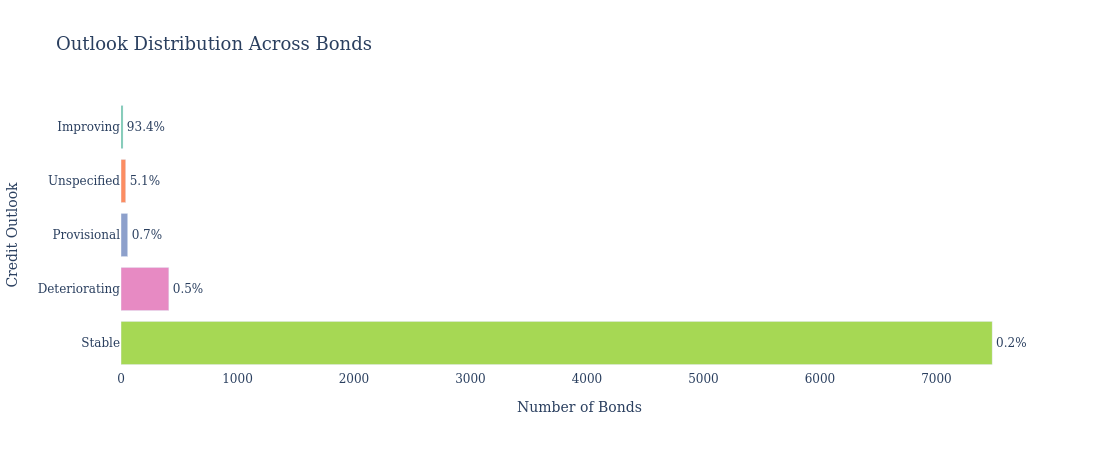

In [112]:
import plotly.express as px

def analyze_outlook_distribution(portfolio_data):
    """
    Analyzes and plots the distribution of credit outlooks across all bonds (rows).
    
    Args:
        portfolio_data (pd.DataFrame): Must contain 'Outlook' column.
    """
    # Clean up outlook column
    portfolio_data['Outlook'] = (
        portfolio_data['Outlook']
        .fillna('Unspecified')
        .astype(str)
        .str.strip()
        .str.title()
    )

    # Count each outlook
    outlook_counts = (
        portfolio_data['Outlook']
        .value_counts()
        .reset_index()
        .rename(columns={'index': 'Outlook', 'Outlook': 'Bond_Count'})
    )

    # Calculate percentages
    total_bonds = outlook_counts['count'].sum()
    outlook_counts['Percentage'] = (100 * outlook_counts['count'] / total_bonds).round(1)

    # Plot
    fig = px.bar(
        outlook_counts.sort_values('count', ascending=True),
        x='count',
        y='Bond_Count',
        orientation='h',
        text=outlook_counts['Percentage'].apply(lambda x: f"{x}%"),
        color='Bond_Count',
        color_discrete_sequence=px.colors.qualitative.Set2,
        title='Outlook Distribution Across Bonds'
    )

    fig.update_traces(textposition='outside', textfont_size=12)
    fig.update_layout(
        width=900,
        height=450,
        xaxis_title='Number of Bonds',
        yaxis_title='Credit Outlook',
        showlegend=True,
        font=dict(family='Segoe UI', size=12),
        title_font_size=18,
        plot_bgcolor='white'
    )

    fig.show()
analyze_outlook_distribution(portfolio_data)

In [35]:
merged.columns

Index(['cusip', 'Obligor', 'Obligor Name', 'maturity', 'coupon', 'Sec_Group',
       'Sec_Type', 'book_yield', 'unrealized_gl', 'Par', 'Rating', 'Outlook',
       'Sector_Level_1', 'Sector', 'County Code', 'County', 'State', 'CBSA',
       'CBSA_title', 'Latitude', 'ZIP', 'Longitude'],
      dtype='object')

### Question 5

In [116]:
portfolio_data

,cusip,Obligor,Obligor Name,maturity,coupon,Sec_Group,Sec_Type,book_yield,unrealized_gl,Par,Rating,Outlook,Sector_Level_1,Sector,Sector_Full
2,64984EDG7,209111,CONSOLIDATED EDISON COMPANY OF NEW YORK INC,2039-05-01,-99.00,CASH,MVRDN,4.550000,99999.90000,100000.0,BBB1,Stable,CORP,ELEC,IDB
7,424898FH2,424888,HENDERSON CNTY N C CTFS PARTN,2027-06-01,4.00,BND,MUNI,0.000000,20859.99580,20000.0,AA3,Stable,TAX,TAXLOCAL,Local Government
8,42806KAB9,42806C,HESPERIA CA CMNTY REDEV AGY,2027-09-01,5.00,BND,MUNI,2.461000,107533.14900,100000.0,A1,Unspecified,TAX,DEVDIST,Development District
9,42806KAC7,42806C,HESPERIA CA CMNTY REDEV AGY,2028-09-01,5.00,BND,MUNI,2.540000,21993.99400,20000.0,A1,Unspecified,TAX,DEVDIST,Development District
10,543103EB7,543103,LONGMONT COLO SALES & USE TAX REVS,2028-11-15,5.00,BND,MUNI,0.000000,55808.56650,50000.0,AA1,Stable,TAX,TAXLOCAL,Local Government
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8097,819892AL4,R96714,SHARP HEALTHCARE,2050-08-01,2.68,BND,CORP,65.565002,-300980.65268,1071000.0,AA3,Stable,HEALTH,HOSP,Hospital
8098,13057EHB3,R96714,SHARP HEALTHCARE,2029-08-01,5.00,BND,MUNI,2.400000,56841.72400,50000.0,AA3,Stable,HEALTH,HOSP,Hospital
8100,57584YLJ6,R97932,BRANDEIS UNIVERSITY,2039-10-01,5.00,BND,MUNI,0.000000,21646.72540,20000.0,A1,Stable,EDUC,UNIVPRIV,Private University
8101,57584YLG2,R97932,BRANDEIS UNIVERSITY,2037-10-01,5.00,BND,MUNI,0.000000,10948.00560,10000.0,A1,Stable,EDUC,UNIVPRIV,Private University


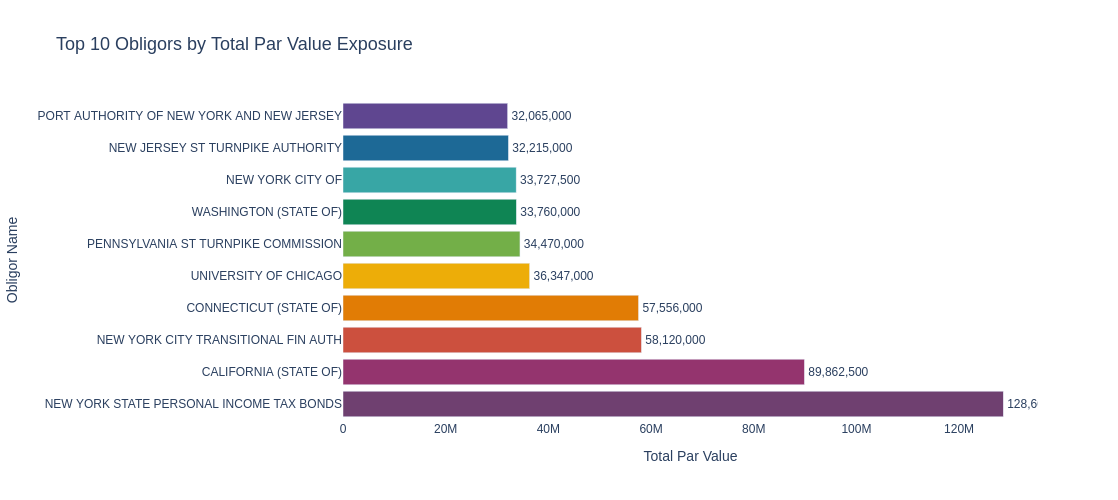

In [118]:
# Drop rows with missing location or obligor name
import plotly.express as px

def top_obligors_by_par(portfolio_data, top_n=10):
    """
    Identifies and visualizes the top obligors by total Par value exposure.

    Args:
        portfolio_data (pd.DataFrame): Must contain 'Obligor' and 'Par' columns.
        top_n (int): Number of top obligors to return (default is 10).
    """
    # Aggregate total Par per obligor
    obligor_par = (
        portfolio_data.groupby('Obligor Name')['Par']
        .sum()
        .reset_index()
        .sort_values(by='Par', ascending=False)
        .head(top_n)
    )

    # Bar chart using Plotly
    fig = px.bar(
        obligor_par.sort_values('Par'),  # ascending for horizontal bar chart
        x='Par',
        y='Obligor Name',
        orientation='h',
        text='Par',
        color='Obligor Name',
        color_discrete_sequence=px.colors.qualitative.Prism,
        title=f'Top {top_n} Obligors by Total Par Value Exposure'
    )

    fig.update_traces(textposition='outside', texttemplate='%{text:,.0f}')
    fig.update_layout(
        width=950,
        height=500,
        xaxis_title='Total Par Value',
        yaxis_title='Obligor Name',
        showlegend=False,
        font=dict(size=12),
        title_font_size=18,
        plot_bgcolor='white'
    )

    fig.show()

top_obligors_by_par(portfolio_data, 10)

In [120]:
portfolio_data

,cusip,Obligor,Obligor Name,maturity,coupon,Sec_Group,Sec_Type,book_yield,unrealized_gl,Par,Rating,Outlook,Sector_Level_1,Sector,Sector_Full,Years_To_Maturity,Maturity_Bucket
2,64984EDG7,209111,CONSOLIDATED EDISON COMPANY OF NEW YORK INC,2039-05-01,-99.00,CASH,MVRDN,4.550000,99999.90000,100000.0,BBB1,Stable,CORP,ELEC,IDB,13.875428,10–15 years
7,424898FH2,424888,HENDERSON CNTY N C CTFS PARTN,2027-06-01,4.00,BND,MUNI,0.000000,20859.99580,20000.0,AA3,Stable,TAX,TAXLOCAL,Local Government,1.960301,<5 years
8,42806KAB9,42806C,HESPERIA CA CMNTY REDEV AGY,2027-09-01,5.00,BND,MUNI,2.461000,107533.14900,100000.0,A1,Unspecified,TAX,DEVDIST,Development District,2.212183,<5 years
9,42806KAC7,42806C,HESPERIA CA CMNTY REDEV AGY,2028-09-01,5.00,BND,MUNI,2.540000,21993.99400,20000.0,A1,Unspecified,TAX,DEVDIST,Development District,3.214237,<5 years
10,543103EB7,543103,LONGMONT COLO SALES & USE TAX REVS,2028-11-15,5.00,BND,MUNI,0.000000,55808.56650,50000.0,AA1,Stable,TAX,TAXLOCAL,Local Government,3.419576,<5 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8097,819892AL4,R96714,SHARP HEALTHCARE,2050-08-01,2.68,BND,CORP,65.565002,-300980.65268,1071000.0,AA3,Stable,HEALTH,HOSP,Hospital,25.127995,20–30 years
8098,13057EHB3,R96714,SHARP HEALTHCARE,2029-08-01,5.00,BND,MUNI,2.400000,56841.72400,50000.0,AA3,Stable,HEALTH,HOSP,Hospital,4.128679,<5 years
8100,57584YLJ6,R97932,BRANDEIS UNIVERSITY,2039-10-01,5.00,BND,MUNI,0.000000,21646.72540,20000.0,A1,Stable,EDUC,UNIVPRIV,Private University,14.294319,10–15 years
8101,57584YLG2,R97932,BRANDEIS UNIVERSITY,2037-10-01,5.00,BND,MUNI,0.000000,10948.00560,10000.0,A1,Stable,EDUC,UNIVPRIV,Private University,12.295688,10–15 years


In [119]:
import pandas as pd
import plotly.express as px
from datetime import datetime

def maturity_profile(portfolio_data):
    today = pd.Timestamp(datetime.today().date())

    # Convert to datetime and calculate years till maturity
    portfolio_data['maturity'] = pd.to_datetime(portfolio_data['maturity'])
    portfolio_data['Years_To_Maturity'] = (portfolio_data['maturity'] - today).dt.days / 365.25

    # Define maturity buckets
    bins = [0, 5, 10, 15, 20, 30, float('inf')]
    labels = ['<5 years', '5–10 years', '10–15 years', '15–20 years', '20–30 years', '30+ years']
    portfolio_data['Maturity_Bucket'] = pd.cut(portfolio_data['Years_To_Maturity'], bins=bins, labels=labels)

    # Count bonds in each bucket
    maturity_counts = (
        portfolio_data['Maturity_Bucket']
        .value_counts()
        .reindex(labels)
        .reset_index()
        .rename(columns={'index': 'Bucket', 'Maturity_Bucket': 'Count'})
    )

    # Plot
    fig = px.bar(
        maturity_counts,
        x='Bucket',
        y='Count',
        text='Count',
        color='Bucket',
        color_discrete_sequence=px.colors.qualitative.Set3,
        title='Maturity Profile of the Portfolio'
    )

    fig.update_traces(textposition='outside')
    fig.update_layout(
        width=800,
        height=450,
        xaxis_title='Maturity Bucket',
        yaxis_title='Number of Bonds',
        showlegend=False,
        plot_bgcolor='white',
        font=dict(size=12)
    )

    fig.show()
maturity_profile(portfolio_data)

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Count', 'count'] but received: Bucket

In [ ]:
location_data["Obligor Name"].nunique()

In [10]:
location_data.dtypes

Obligor Name     object
County Code     float64
County           object
State            object
CBSA            float64
CBSA_title       object
Latitude        float64
ZIP              object
Longitude       float64
dtype: object

In [14]:
import plotly.io as pio
pio.renderers.default = 'notebook'  # or 'iframe', 'iframe_connected', or 'browser'


In [121]:
def identify_jump_risk(portfolio_data):
    """
    Identifies bonds with jump-to-junk risk: BBB-rated with negative outlook.
    """
    df = portfolio_data.copy()

    # Normalize rating and outlook
    df['Rating'] = df['Rating'].astype(str).str.upper().str.strip()
    df['Outlook'] = df['Outlook'].astype(str).str.title().str.strip()

    # Filter
    jump_risk_df = df[df['Rating'].str.startswith('BBB') & (df['Outlook'] == 'Negative')]

    print(f"⚠️ Jump Risk Bonds Found: {len(jump_risk_df)}")
    return jump_risk_df[['Obligor', 'Rating', 'Outlook', 'Par']].sort_values(by='Par', ascending=False)
identify_jump_risk(portfolio_data)

⚠️ Jump Risk Bonds Found: 0


,Obligor,Rating,Outlook,Par


In [123]:
def geographic_diversification(portfolio_data):
    """
    Plots total Par value by U.S. state.
    Requires 'State' and 'Par' columns.
    """
    state_exposure = (
        portfolio_data.groupby('State')['Par']
        .sum()
        .reset_index()
        .sort_values(by='Par', ascending=False)
    )

    fig = px.choropleth(
        state_exposure,
        locations='State',
        locationmode='USA-states',
        color='Par',
        color_continuous_scale='Blues',
        scope='usa',
        title='Geographic Diversification by Par Exposure'
    )

    fig.update_layout(
        geo=dict(showlakes=True, lakecolor='rgb(255, 255, 255)'),
        width=950,
        height=600
    )

    fig.show()
geographic_diversification(portfolio_data)

KeyError: 'State'

In [43]:
location_data_unique.head()

,cusip,Obligor,Obligor Name,maturity,coupon,Sec_Group,Sec_Type,book_yield,unrealized_gl,Par,Rating,Outlook,Sector_Level_1,Sector,County,State,ZIP,Latitude,Longitude
0,4423485T1,210795,UNITED AIRLINES INC,2038-07-15,6.625,BND,MUNI,4.050000,-12979.08765,405000.0,BB3,Stable,CORP,AIRL,"Cook, IL",IL,60606,41.8868,-87.6386
1,650116GP5,247361,DELTA AIR LINES INC,2040-04-01,5.625,BND,MUNI,5.807238,114091.81350,1050000.0,BBB3,Stable,CORP,AIRL,"Fulton, GA",GA,30354,33.6675,-84.3896
2,424898FH2,424888,HENDERSON CNTY N C CTFS PARTN,2027-06-01,4.000,BND,MUNI,0.000000,20859.99580,20000.0,AA3,Stable,TAX,TAXLOCAL,"Henderson, NC",NC,28792,35.3613,-82.4264
3,42806KAB9,42806C,HESPERIA CA CMNTY REDEV AGY,2027-09-01,5.000,BND,MUNI,2.461000,107533.14900,100000.0,A1,NaN,TAX,DEVDIST,"San Bernardino, CA",CA,92345,34.4222,-117.3025
4,543103EB7,543103,LONGMONT COLO SALES & USE TAX REVS,2028-11-15,5.000,BND,MUNI,0.000000,55808.56650,50000.0,AA1,Stable,TAX,TAXLOCAL,"Boulder, CO",CO,80501,40.1779,-105.1009


In [56]:
# Create a mapping dictionary from sector_dcodes
sector_map = dict(zip(sector_dcodes['Sector'], sector_dcodes['Sector_Full']))

# Map and create new column in portfolio_data
portfolio_data['Sector_Full'] = portfolio_data['Sector'].map(sector_map)


In [73]:
merged_data_unique.to_csv("test.csv")

In [71]:
import folium
from folium.plugins import MarkerCluster, HeatMap
import pandas as pd

def generate_obligor_map(location_data_unique):
    """
    Generates a folium map with marker clusters, multiple basemaps, and heatmap overlay.

    Args:
        location_data_unique (pd.DataFrame): DataFrame with columns:
            - 'Obligor Name', 'County', 'State', 'ZIP', 'Latitude', 'Longitude'

    Returns:
        folium.Map: Interactive map object with larger size
    """

    # Create base map with larger dimensions
    m = folium.Map(
        location=[39.8283, -98.5795],
        zoom_start=4,
        tiles=None,
        width='100%',      # full width
        height='700px'     # increased height
    )

    # Add basemap tile layers with attribution
    tile_layers = [
        {
            "name": "CartoDB Light",
            "tiles": "https://cartodb-basemaps-a.global.ssl.fastly.net/light_all/{z}/{x}/{y}.png",
            "attr": "©OpenStreetMap, ©CartoDB"
        }
    ]

    for tile in tile_layers:
        folium.TileLayer(tiles=tile["tiles"], name=tile["name"], attr=tile["attr"]).add_to(m)

    # Marker Cluster Layer
    marker_group = folium.FeatureGroup(name="Obligor Markers").add_to(m)
    marker_cluster = MarkerCluster().add_to(marker_group)

    for _, row in merged_data_unique.iterrows():
        if pd.isna(row['Latitude']) or pd.isna(row['Longitude']):
            continue  # skip incomplete coordinates

        popup_html = f"""
        <b>{row['Obligor Name']}</b><br>
        County: {row['County']}<br>
        State: {row['State']}<br>
        ZIP: {row['ZIP']}<br>
        Sector: {row['Sector']}<br>
        """
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=folium.Popup(popup_html, max_width=300),
            tooltip=row['Obligor Name']
        ).add_to(marker_cluster)

    # Heatmap layer
    heat_data = location_data_unique[['Latitude', 'Longitude']].dropna().values.tolist()
    heatmap_layer = folium.FeatureGroup(name="Heat Map")
    HeatMap(heat_data, radius=15, blur=10).add_to(heatmap_layer)
    heatmap_layer.add_to(m)

    # Layer control
    folium.LayerControl(collapsed=False).add_to(m)

    return m


In [89]:
# generate_obligor_map(location_data_unique)
# st_folium(map_obj, width=700, height=500)

In [67]:
portfolio_data

,cusip,Obligor,Obligor Name,maturity,coupon,Sec_Group,Sec_Type,book_yield,unrealized_gl,Par,Rating,Outlook,Sector_Level_1,Sector,Sector_Full
0,546398ZP6,009158,AIR PRODUCTS AND CHEMICALS INC,2043-12-01,-99.000,CASH,MVRDN,3.00000,0.00000,37000000.0,A1,NaN,CORP,CHEM,NaN
1,56678TAA7,201723,COMMERCIAL METALS COMPANY,2047-10-15,4.000,BND,MUNI,3.65993,-861401.04000,7175000.0,BB1,Stable,CORP,METL,NaN
2,64984EDG7,209111,CONSOLIDATED EDISON COMPANY OF NEW YORK INC,2039-05-01,-99.000,CASH,MVRDN,4.55000,99999.90000,100000.0,BBB1,Stable,CORP,ELEC,IDB
3,4423485T1,210795,UNITED AIRLINES INC,2038-07-15,6.625,BND,MUNI,4.05000,-12979.08765,405000.0,BB3,Stable,CORP,AIRL,NaN
4,13050RAA0,210795,UNITED AIRLINES INC,2029-07-15,4.000,BND,MUNI,4.23300,32715.02500,2500000.0,BB3,Stable,CORP,AIRL,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8098,13057EHB3,R96714,SHARP HEALTHCARE,2029-08-01,5.000,BND,MUNI,2.40000,56841.72400,50000.0,AA3,Stable,HEALTH,HOSP,Hospital
8099,57585BAA6,R97926,BOSTON CHILDRENS HOSPITAL TRUST,2034-03-01,5.000,BND,MUNI,2.71100,212470.44175,175000.0,NaN,NaN,HEALTH,HOSP,Hospital
8100,57584YLJ6,R97932,BRANDEIS UNIVERSITY,2039-10-01,5.000,BND,MUNI,0.00000,21646.72540,20000.0,A1,Stable,EDUC,UNIVPRIV,Private University
8101,57584YLG2,R97932,BRANDEIS UNIVERSITY,2037-10-01,5.000,BND,MUNI,0.00000,10948.00560,10000.0,A1,Stable,EDUC,UNIVPRIV,Private University


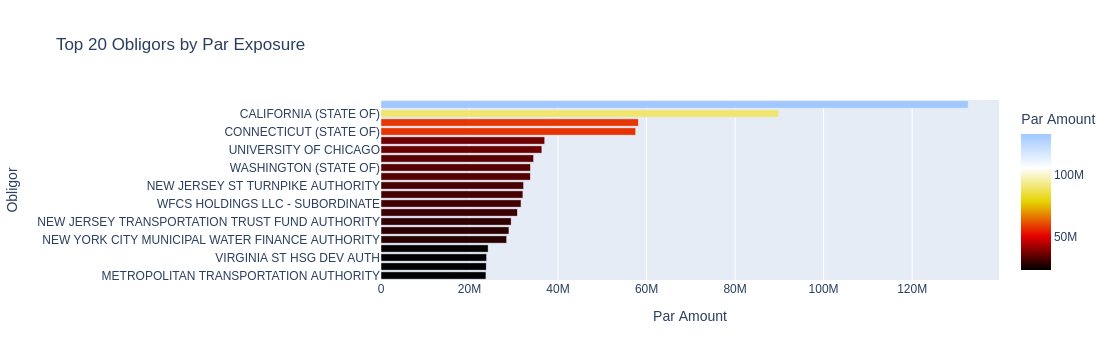

In [70]:
import plotly.express as px

# Group and prepare data
exposure_df = portfolio_data.groupby('Obligor Name', as_index=False)['Par'].sum()
exposure_df = exposure_df.sort_values(by='Par', ascending=False).head(20)

# Plot
fig = px.bar(
    exposure_df,
    x='Par',
    y='Obligor Name',
    orientation='h',
    title='Top 20 Obligors by Par Exposure',
    labels={'Par': 'Par Amount', 'Obligor Name': 'Obligor'},
    color='Par',
    color_continuous_scale='blackbody'
)

fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.show()


In [68]:
exposure_df

,Obligor Name,Par
1510,NEW YORK STATE PERSONAL INCOME TAX BONDS,1.326450e+08
269,CALIFORNIA (STATE OF),8.986250e+07
1488,NEW YORK CITY TRANSITIONAL FIN AUTH,5.812000e+07
479,CONNECTICUT (STATE OF),5.755600e+07
17,AIR PRODUCTS AND CHEMICALS INC,3.700000e+07
2264,UNIVERSITY OF CHICAGO,3.634700e+07
1698,PENNSYLVANIA ST TURNPIKE COMMISSION,3.447000e+07
2364,WASHINGTON (STATE OF),3.376000e+07
1487,NEW YORK CITY OF,3.372750e+07
1469,NEW JERSEY ST TURNPIKE AUTHORITY,3.221500e+07
